In [1]:
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time

# Set Chrome options
chrome_options = Options()
# Add any additional options as needed

# Specify the path to the ChromeDriver executable
chrome_driver_path = "/Users/saipranayreddy/Downloads/chromedriver_mac64"

# Create a new Service instance
service = Service(chrome_driver_path)

# Create a new ChromeDriver instance
driver = webdriver.Chrome(service=service, options=chrome_options)

# URL of the YouTube video
video_url = "https://www.youtube.com/watch?v=DrNtuAgwWgQ"

# Maximize the browser window (optional)
driver.maximize_window()

# Navigate to the YouTube video URL
driver.get(video_url)

# Scroll down to load more comments
for item in range(50):
    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
    time.sleep(2)  # Adjust the wait time as needed

# Find and extract the comments
comments = driver.find_elements(By.CSS_SELECTOR, "#content")

# Store the comments in the data list
data = [comment.text for comment in comments]

# Output the comments
for comment in data:
    print(comment)

# Remember to quit the driver when you're done
driver.quit()


IN
Skip navigation
Sign in
Up next in 3
38:05
BTS Best Stage Mix Compilation🔥방탄소년단 무대모음 KBS Music Bank, KBS Song Festival
KBS충북
25M views • 1 year ago
CANCEL
PLAY NOW
2:42 / 2:42
NewJeans (뉴진스) 'Zero' Performance Video
NewJeans
3.86M subscribers
Subscribe
157K
Share
Download
4.5M views  2 months ago
Connect with NewJeans

PHONING https://phoning.onelink.me/KG15/n7452q87 …
Show more
4,704 Comments
Sort by
Add a comment…
@xei9413
2 months ago
these girls are out here making history and it hasnt even been 1 year since they debuted, i’m so proud of them 🫶🫶
5.8K
Reply
126 replies
@Azrl34
2 months ago
NewJeans MV's doesn't feel overproduced leaving the impression that they are just a bunch of friends having fun and not industry plants. Their choreo also seems playful and not overly strict leaving the raw feeling that allows the viewers to feel connected. Usually artists feel like they are levels above but NJ just seems to have a different kind of connection with their audience. big fan of th

In [4]:
import pandas as pd   
df = pd.DataFrame(data, columns=['comment'])
df.head(400)

# Remove first and second comments
df = df.iloc[2:]

# Remove empty comments
df = df[df['comment'].notna()]

# Remove last 6 comments
df = df.iloc[:-6]

# Reset the index
df = df.reset_index(drop=True)

df

,comment
0,these girls are out here making history and it...
1,NewJeans MV's doesn't feel overproduced leavin...
2,My favorite part is when Haerin and Danielle r...
3,Me encanta cuando baila minji y celebran
4,"I don’t care what others said, this song fckin..."
...,...
955,"nhỏ út cao ráo, nhìn cứ bị ngầu ấy hehe"
956,babies
957,Icónicas
958,coolll


In [5]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saipranayreddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Preprocessing
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [7]:
def preprocess_comment(comment):
    comment = re.sub(r"http\S+|www\S+|https\S+", "", comment)  # Remove URLs
    comment = re.sub(r"[^\w\s]", "", comment)  # Remove special characters
    tokens = word_tokenize(comment)  # Tokenize the comment
    stop_words = set(stopwords.words("english"))  # Get English stopwords
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    return tokens


In [8]:
df['processed_comment'] = df['comment'].apply(preprocess_comment)


In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/saipranayreddy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saipranayreddy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df

,comment,processed_comment
0,these girls are out here making history and it...,"[girls, making, history, hasnt, even, 1, year,..."
1,NewJeans MV's doesn't feel overproduced leavin...,"[NewJeans, MVs, doesnt, feel, overproduced, le..."
2,My favorite part is when Haerin and Danielle r...,"[My, favorite, part, Haerin, Danielle, run, ac..."
3,Me encanta cuando baila minji y celebran,"[Me, encanta, cuando, baila, minji, celebran]"
4,"I don’t care what others said, this song fckin...","[I, dont, care, others, said, song, fcking, hi..."
...,...,...
955,"nhỏ út cao ráo, nhìn cứ bị ngầu ấy hehe","[nhỏ, út, cao, ráo, nhìn, cứ, bị, ngầu, ấy, hehe]"
956,babies,[babies]
957,Icónicas,[Icónicas]
958,coolll,[coolll]


In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Iterate over the comments and perform sentiment analysis
for comment in df['processed_comment']:
    comment_text = ' '.join(comment)  # Convert the preprocessed comment back to a string
    sentiment_scores = sia.polarity_scores(comment_text)
    sentiment = sentiment_scores['compound']  # Extract the compound sentiment score

    # Determine sentiment label based on the compound score
    if sentiment >= 0.05:
        sentiment_label =  'Positive'
    elif sentiment <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'

    # Print the comment, sentiment score, and sentiment label
    print(f"Comment: {comment_text}")
    print(f"Sentiment Score: {sentiment_scores['compound']}")
    print(f"Sentiment Label: {sentiment_label}")
    print("----------")


Comment: girls making history hasnt even 1 year since debuted im proud
Sentiment Score: 0.4767
Sentiment Label: Positive
----------
Comment: NewJeans MVs doesnt feel overproduced leaving impression bunch friends fun industry plants Their choreo also seems playful overly strict leaving raw feeling allows viewers feel connected Usually artists feel like levels NJ seems different kind connection audience big fan company direction heading towards
Sentiment Score: 0.9578
Sentiment Label: Positive
----------
Comment: My favorite part Haerin Danielle run across screen 105 silly fits
Sentiment Score: 0.4767
Sentiment Label: Positive
----------
Comment: Me encanta cuando baila minji celebran
Sentiment Score: 0.0
Sentiment Label: Neutral
----------
Comment: I dont care others said song fcking hits hard I love girls performance looks fun ugh Newjeans become fav 4th gen group music totally alley
Sentiment Score: 0.688
Sentiment Label: Positive
----------
Comment: hyeins voice masterpiece
Sentiment

----------
Comment: Their songs different many Kpop songs
Sentiment Score: 0.0
Sentiment Label: Neutral
----------
Comment: Me gusta mucho la coreografía espero que la puedan bailar cantar la canción en lolla
Sentiment Score: 0.0
Sentiment Label: Neutral
----------
Comment: I listen song least three times day
Sentiment Score: 0.0
Sentiment Label: Neutral
----------
Comment: Walang tapon talaga sa mga kanta ng newjeans
Sentiment Score: 0.0
Sentiment Label: Neutral
----------
Comment: FELIZ CUMPLEAÑOS DANIELLE HAPPY BIRTHDAY 11April2023
Sentiment Score: 0.6633
Sentiment Label: Positive
----------
Comment: think fave choreo newjeans fun personalites show sm like dani haerin running 105 LMAOAO
Sentiment Score: 0.8271
Sentiment Label: Positive
----------
Comment: Even though advertisement I really love song chorus I mean pretty catchy though ngl
Sentiment Score: 0.8268
Sentiment Label: Positive
----------
Comment: 이정도면 코카콜라에서 인센티브 줘도 된다
Sentiment Score: 0.0
Sentiment Label: Neutral
--------

Sentiment Label: Neutral
----------
Comment: No one Covid 2020 043
Sentiment Score: -0.296
Sentiment Label: Negative
----------
Comment: haerin
Sentiment Score: 0.0
Sentiment Label: Neutral
----------
Comment: Transisi nya bagus jg
Sentiment Score: 0.0
Sentiment Label: Neutral
----------
Comment: Legendarias
Sentiment Score: 0.0
Sentiment Label: Neutral
----------
Comment: well remember advertational mv good
Sentiment Score: 0.6124
Sentiment Label: Positive
----------
Comment: Hanni
Sentiment Score: 0.0
Sentiment Label: Neutral
----------
Comment: 1606158 views 113k likes 38k comments 339M subscribers Nice
Sentiment Score: 0.6808
Sentiment Label: Positive
----------
Comment: cmon ador release dance practice
Sentiment Score: 0.0
Sentiment Label: Neutral
----------
Comment: Love u girls
Sentiment Score: 0.6369
Sentiment Label: Positive
----------
Comment: song fire idc
Sentiment Score: -0.34
Sentiment Label: Negative
----------
Comment: drum n base new jeans
Sentiment Score: 0.0
Sentimen

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Initialize lists to store positive and negative comments
positive_comments = []
negative_comments = []

# Iterate over the comments and perform sentiment analysis
for comment in df['processed_comment']:
    comment_text = ' '.join(comment)  # Convert the preprocessed comment back to a string
    sentiment_scores = sia.polarity_scores(comment_text)
    sentiment = sentiment_scores['compound']  # Extract the compound sentiment score

    # Determine sentiment label based on the compound score
    if sentiment >= 0.05:
        positive_comments.append((sentiment, comment_text))
    elif sentiment <= -0.05:
        negative_comments.append((sentiment, comment_text))

# Sort the positive and negative comments based on sentiment score
positive_comments.sort(reverse=True)
negative_comments.sort()

# Get the top 10 positive and negative comments
top_positive_comments = positive_comments[:20]
top_negative_comments = negative_comments[:20]

# Print the top 10 positive comments
print("Top 20 Positive Comments:")
for sentiment, comment in top_positive_comments:
    print(f"Sentiment Score: {sentiment}")
    print(f"Comment: {comment}")
    print("----------")

# Print the top 10 negative comments
print("Top 20 Negative Comments:")
for sentiment, comment in top_negative_comments:
    print(f"Sentiment Score: {sentiment}")
    print(f"Comment: {comment}")
    print("----------")


Top 20 Positive Comments:
Sentiment Score: 0.9762
Comment: These girls pretty like But Minji handsomely pretty I love style bits And husky voice really amazing
----------
Sentiment Score: 0.9752
Comment: So sparkling eyes winking boy beautiful eyes got lost yeah catch guard sometimes got confidence liked get go cool ever oh zero pressure cuz see us going far refreshing would pop around world like magic Im ready lets go already know I dont ever want us I dont ever want us I dont want us apart I dont ever want us I dont ever want us apart chorus CocaCola tasty CocaCola tasty seeing looking catch heres cola see looking catch heres cola CocaCola tasty CocaCola tasty see looking catch heres cola see looking catch heres cola rap I curio black caught myour hooked yeah tease sometimes got super sweetness likedyou get go sweet ever oh zero fear cuz know ya shooting star I see us going far refreshing would pop around world like magic Im ready lets go already know dont ever want us I dont ever wa

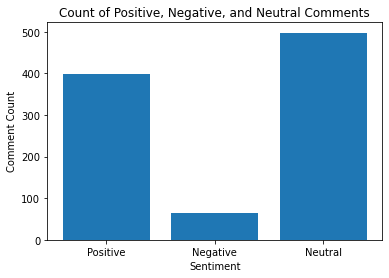

In [14]:
import matplotlib.pyplot as plt

# Initialize counters for positive, negative, and neutral comments
positive_count = 0
negative_count = 0
neutral_count = 0

# Iterate over the comments and perform sentiment analysis
for comment in df['processed_comment']:
    comment_text = ' '.join(comment)  # Convert the preprocessed comment back to a string
    sentiment_scores = sia.polarity_scores(comment_text)
    sentiment = sentiment_scores['compound']  # Extract the compound sentiment score

    # Determine sentiment label based on the compound score and update the respective count
    if sentiment >= 0.05:
        positive_count += 1
    elif sentiment <= -0.05:
        negative_count += 1
    else:
        neutral_count += 1

# Create a bar chart to visualize the comment counts
sentiment_labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

plt.bar(sentiment_labels, comment_counts)
plt.xlabel('Sentiment')
plt.ylabel('Comment Count')
plt.title('Count of Positive, Negative, and Neutral Comments')
plt.show()


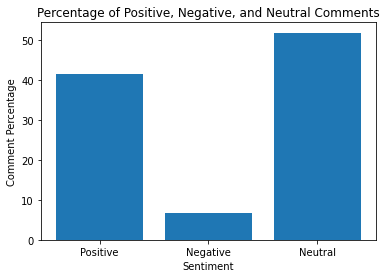

In [15]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.corpus import words as english_words

# Initialize counters for positive, negative, and neutral comments
positive_count = 0
negative_count = 0
neutral_count = 0

# Get the set of English stopwords
english_stopwords = set(stopwords.words("english"))

# Get the set of English words
english_word_set = set(english_words.words())

# Iterate over the comments and perform sentiment analysis
for comment in df['processed_comment']:
    comment_text = ' '.join(comment)  # Convert the preprocessed comment back to a string
    sentiment_scores = sia.polarity_scores(comment_text)

    # Remove stopwords and non-English words from the comment text
    comment_words = comment_text.split()
    comment_words = [word for word in comment_words if word.lower() not in english_stopwords and word.lower() in english_word_set]
    comment_text = ' '.join(comment_words)

    sentiment = sentiment_scores['compound']  # Extract the compound sentiment score

    # Determine sentiment label based on the compound score and update the respective count
    if sentiment >= 0.05:
        positive_count += 1
    elif sentiment <= -0.05:
        negative_count += 1
    else:
        neutral_count += 1

# Calculate the total number of comments
total_count = positive_count + negative_count + neutral_count

# Calculate the percentage of each sentiment
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100

# Create a bar chart to visualize the comment percentages
sentiment_labels = ['Positive', 'Negative', 'Neutral']
comment_percentages = [positive_percentage, negative_percentage, neutral_percentage]

plt.bar(sentiment_labels, comment_percentages)
plt.xlabel('Sentiment')
plt.ylabel('Comment Percentage')
plt.title('Percentage of Positive, Negative, and Neutral Comments')
plt.show()

In [16]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize stopwords
stop_words = set(stopwords.words("english"))

# Initialize counters for positive, negative, and neutral comments
positive_words = []
negative_words = []
neutral_words = []

# Iterate over the comments and perform sentiment analysis
for comment in df['processed_comment']:
    comment_text = ' '.join(comment)  # Convert the preprocessed comment back to a string
    sentiment_scores = sia.polarity_scores(comment_text)
    sentiment = sentiment_scores['compound']  # Extract the compound sentiment score

    # Determine sentiment label based on the compound score and update the respective word list
    if sentiment >= 0.05:
        positive_words.extend([word for word in comment if word not in stop_words and len(word) > 3])
    elif sentiment <= -0.05:
        negative_words.extend([word for word in comment if word not in stop_words and len(word) > 3])
    else:
        neutral_words.extend([word for word in comment if word not in stop_words and len(word) > 3])

# Count the occurrences of words in each sentiment label
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)
neutral_word_counts = Counter(neutral_words)

# Get the top 20 most common words for each sentiment label
top_positive_words = positive_word_counts.most_common(20)
top_negative_words = negative_word_counts.most_common(20)
top_neutral_words = neutral_word_counts.most_common(20)

# Print the top 20 most common words for each sentiment label
print("Top 20 meaningful words in positive sentiment:")
for word, count in top_positive_words:
    print(f"{word}: {count}")

print("\nTop 20 meaningful words in negative sentiment:")
for word, count in top_negative_words:
    print(f"{word}: {count}")

print("\nTop 20 meaningful words in neutral sentiment:")
for word, count in top_neutral_words:
    print(f"{word}: {count}")



Top 20 meaningful words in positive sentiment:
love: 92
song: 74
like: 67
dance: 33
good: 33
part: 31
best: 26
NewJeans: 25
much: 25
dont: 22
girls: 21
They: 20
cola: 20
even: 19
Minji: 19
jeans: 19
This: 19
Danielle: 18
kpop: 18
cute: 18

Top 20 meaningful words in negative sentiment:
song: 15
This: 7
dance: 6
spoty: 6
chorus: 6
good: 6
cant: 5
video: 4
obsessed: 4
Hanni: 4
THIS: 4
canción: 4
hard: 4
newjeans: 4
catchy: 4
dont: 4
ever: 4
want: 4
Corea: 4
stuck: 4

Top 20 meaningful words in neutral sentiment:
Siiiii: 23
canción: 16
song: 15
jeans: 13
NewJeans: 13
코카콜라: 12
spoty: 10
dance: 8
canciones: 8
part: 7
This: 7
coreografía: 7
Minji: 6
퍼포먼스: 6
chicas: 6
haerin: 6
como: 6
group: 6
MINJI: 6
str3m: 6


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saipranayreddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/var/folders/p6/kpwvshld1cz16s5ky9m6qq8m0000gn/T/ipykernel_1644/3151041782.py:37: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  plt.tight_layout()
/var/folders/p6/kpwvshld1cz16s5ky9m6qq8m0000gn/T/ipykernel_1644/3151041782.py:37: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  plt.tight_layout()
/var/folders/p6/kpwvshld1cz16s5ky9m6qq8m0000gn/T/ipykernel_1644/3151041782.py:37: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from current font.
  plt.tight_layout()
/var/folders/p6/kpwvshld1cz16s5ky9m6qq8m0000gn/T/ipykernel_1644/3151041782.py:37: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  plt.tight_layout()
/var/folders/p6/kpwvshld1cz16s5ky9m6qq8m0000gn/T/ipykernel_1644/3151041782.py:37: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from current font.
  plt.tight_layout()
/var/folders/p6/kpwvshld1cz16s5ky9m6qq8m0000gn/T/ipykernel_1644/3151041782.py:37: UserWarning: Gly

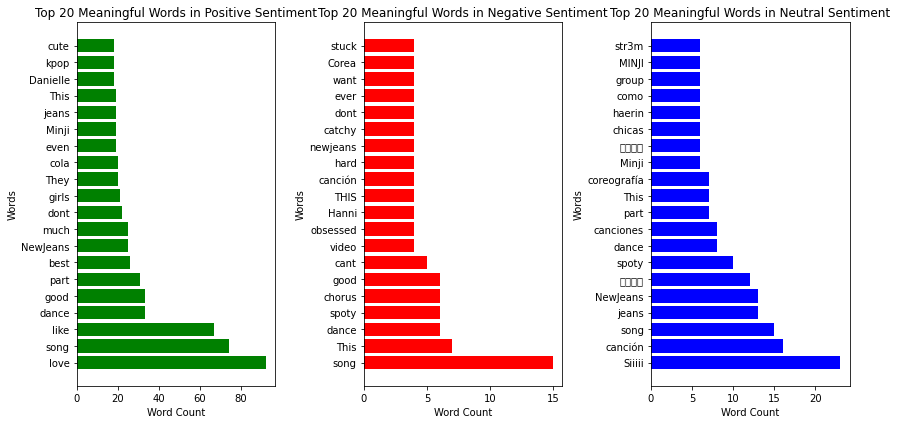

In [17]:
import matplotlib.pyplot as plt

# Get the top 20 most common words for each sentiment label
top_positive_words = positive_word_counts.most_common(20)
top_negative_words = negative_word_counts.most_common(20)
top_neutral_words = neutral_word_counts.most_common(20)

# Extract the words and their corresponding counts for plotting
positive_words, positive_counts = zip(*top_positive_words)
negative_words, negative_counts = zip(*top_negative_words)
neutral_words, neutral_counts = zip(*top_neutral_words)

# Plot the top 20 most common words for each sentiment label
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.barh(range(len(positive_words)), positive_counts, align='center', color='green')
plt.yticks(range(len(positive_words)), positive_words)
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.title('Top 20 Meaningful Words in Positive Sentiment')

plt.subplot(1, 3, 2)
plt.barh(range(len(negative_words)), negative_counts, align='center', color='red')
plt.yticks(range(len(negative_words)), negative_words)
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.title('Top 20 Meaningful Words in Negative Sentiment')

plt.subplot(1, 3, 3)
plt.barh(range(len(neutral_words)), neutral_counts, align='center', color='blue')
plt.yticks(range(len(neutral_words)), neutral_words)
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.title('Top 20 Meaningful Words in Neutral Sentiment')

plt.tight_layout()
plt.show()


In [18]:
english_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the preprocessed comments into a document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df['processed_comment'].apply(lambda x: ' '.join(x)))

# Apply LDA to the document-term matrix
lda = LatentDirichletAllocation(n_components=20)  # Specify the number of topics
lda.fit(dtm)

# Get the most important keywords for each topic
feature_names = vectorizer.get_feature_names()
num_top_keywords = 10  # Number of keywords to extract for each topic
topic_keywords = []
for topic_weights in lda.components_:
    top_keyword_indices = topic_weights.argsort()[:-num_top_keywords - 1:-1]
    top_keywords = [feature_names[index] for index in top_keyword_indices]
    topic_keywords.append(top_keywords)

# Print the keywords for each topic
for topic_id, keywords in enumerate(topic_keywords):
    print(f"Topic #{topic_id}: {', '.join(keywords)}")


Topic #0: amazing, love, song, 진짜, dance, hanni, haerin, 사랑해, like, 너무
Topic #1: new, jeans, beautiful, lindas, eyes, minji, stunning, like, never, danielle
Topic #2: minji, girls, they, coreografía, 050, vibe, such, dont, kalian, kpop
Topic #3: 뉴진스, love, song, pretty, much, girls, like, cola, first, minji
Topic #4: en, de, el, la, con, omg, spoty, es, que, canción
Topic #5: coke, cola, making, siiiii, coca, dance, drink, lol, maravillosas, magic
Topic #6: song, part, newjeans, minjis, even, great, solo, 진짜, is, 너무
Topic #7: birthday, happy, danielle, dance, hanni, song, slay, addicting, parts, part
Topic #8: song, like, chorus, this, good, newjeans, 뉴진스, ad, people, first
Topic #9: they, kpop, best, 다니엘, 다니, song, 너무, 진짜, industry, dance
Topic #10: voice, fav, la, love, 코카콜라, part, song, really, hyeins, 뉴진스
Topic #11: im, songs, song, newjeans, obsessed, perfect, 뉴진스, nice, give, group
Topic #12: love, much, choreography, newjeans, like, dance, song, their, fun, always
Topic #13: min

/Users/saipranayreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
pos_tagged_comments = [pos_tag(comment) for comment in df['processed_comment']]


In [21]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/saipranayreddy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
pos_tagged_comments

[[('girls', 'NNS'),
  ('making', 'VBG'),
  ('history', 'NN'),
  ('hasnt', 'VBD'),
  ('even', 'RB'),
  ('1', 'CD'),
  ('year', 'NN'),
  ('since', 'IN'),
  ('debuted', 'VBN'),
  ('im', 'NN'),
  ('proud', 'NN')],
 [('NewJeans', 'NNS'),
  ('MVs', 'NNP'),
  ('doesnt', 'NN'),
  ('feel', 'NN'),
  ('overproduced', 'VBD'),
  ('leaving', 'VBG'),
  ('impression', 'NN'),
  ('bunch', 'NN'),
  ('friends', 'VBZ'),
  ('fun', 'JJ'),
  ('industry', 'NN'),
  ('plants', 'NNS'),
  ('Their', 'PRP$'),
  ('choreo', 'NN'),
  ('also', 'RB'),
  ('seems', 'VBZ'),
  ('playful', 'JJ'),
  ('overly', 'RB'),
  ('strict', 'JJ'),
  ('leaving', 'VBG'),
  ('raw', 'JJ'),
  ('feeling', 'NN'),
  ('allows', 'VBZ'),
  ('viewers', 'NNS'),
  ('feel', 'VBP'),
  ('connected', 'VBN'),
  ('Usually', 'RB'),
  ('artists', 'VBZ'),
  ('feel', 'VBP'),
  ('like', 'IN'),
  ('levels', 'NNS'),
  ('NJ', 'NNP'),
  ('seems', 'VBZ'),
  ('different', 'JJ'),
  ('kind', 'NN'),
  ('connection', 'NN'),
  ('audience', 'NN'),
  ('big', 'JJ'),
  ('fan',

In [46]:
english_words = set(nltk.corpus.words.words())
adjectives = [word for comment in pos_tagged_comments for word, pos in comment if pos == 'JJ' and word.lower() in english_words]

# Count the frequency of adjectives
adjective_freq = nltk.FreqDist(adjectives)

# Print the most common adjectives and their frequencies
for word, frequency in adjective_freq.most_common():
    print(f"{word}: {frequency}")


good: 36
much: 13
new: 13
different: 11
el: 11
song: 10
top: 10
beautiful: 9
tasty: 9
great: 9
en: 8
global: 8
u: 8
first: 6
un: 6
favorite: 5
next: 5
whole: 5
las: 5
Happy: 5
fresh: 4
natural: 4
perfect: 4
commercial: 4
super: 4
hard: 4
live: 4
es: 4
many: 4
real: 4
cool: 4
magic: 4
fun: 3
unique: 3
solo: 3
NEW: 3
easy: 3
cute: 3
catchy: 3
facial: 3
bad: 3
adorable: 3
crazy: 3
little: 3
n: 3
cant: 3
hear: 3
dont: 3
playful: 2
big: 2
ugh: 2
awesome: 2
individual: 2
absolute: 2
chic: 2
smile: 2
weird: 2
black: 2
huge: 2
energetic: 2
overall: 2
true: 2
give: 2
visual: 2
iconic: 2
Such: 2
um: 2
gorgeous: 2
beat: 2
advertisement: 2
didnt: 2
know: 2
coke: 2
dumb: 2
sweet: 2
amazing: 2
long: 2
happy: 2
al: 2
nostalgic: 2
fan: 2
skill: 2
everyday: 2
Kalian: 2
stuck: 2
dynamic: 2
HAPPY: 2
total: 2
ready: 2
couch: 2
squid: 2
strict: 1
raw: 1
screen: 1
alley: 1
funny: 1
regular: 1
signature: 1
tan: 1
YOU: 1
idol: 1
equal: 1
obvious: 1
REALLY: 1
random: 1
GOOD: 1
glad: 1
old: 1
courageous: 1
magi

In [47]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the sentiment analyzer
sia = SentimentIntensityAnalyzer()

positive_words = []
negative_words = []

# Iterate over the adjective frequency distribution
for word, frequency in adjective_freq.items():
    # Calculate the sentiment score for each word
    sentiment_score = sia.polarity_scores(word)['compound']
    
    # Classify words as positive or negative based on sentiment score
    if sentiment_score >= 0.05:
        positive_words.append(word)
    elif sentiment_score <= -0.05:
        negative_words.append(word)

# Print the list of positive and negative words
print("Positive Words:")
print(positive_words)
print("\nNegative Words:")
print(negative_words)


Positive Words:
['fun', 'playful', 'favorite', 'beautiful', 'fresh', 'funny', 'good', 'natural', 'awesome', 'easy', 'perfect', 'chic', 'smile', 'GOOD', 'glad', 'courageous', 'super', 'huge', 'clean', 'energetic', 'cute', 'true', 'youthful', 'top', 'talented', 'popular', 'great', 'enjoy', 'cool', 'adorable', 'successful', 'important', 'gorgeous', 'sure', 'free', 'pleasant', 'Good', 'supportive', 'sweet', 'Wow', 'amazing', 'happy', 'excited', 'talent', 'genial', 'pretty', 'Amazing', 'grand', 'fan', 'relaxed', 'dynamic', 'HAPPY', 'excellent', 'competitive', 'attractive', 'special', 'Happy', 'fit', 'sparkling', 'ready', 'yeah', 'STUNNING', 'LIKE', 'masterpiece', 'interesting', 'powerful', 'Beautiful', 'delicious']

Negative Words:
['ugh', 'weird', 'hard', 'contagious', 'bad', 'crazy', 'dumb', 'boring', 'mad', 'chaotic', 'drop', 'spite', 'stuck', 'sick', 'annoy', 'fear', 'sad', 'crash']


In [55]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the sentiment analyzer
sia = SentimentIntensityAnalyzer()

positive_words = []
negative_words = []

# Iterate over the adjective frequency distribution
for word, frequency in adjective_freq.items():
    # Calculate the sentiment score for each word
    sentiment_score = sia.polarity_scores(word)['compound']
    
    # Classify words as positive or negative based on sentiment score
    if sentiment_score >= 0.05:
        positive_words.append((word, sentiment_score))
    elif sentiment_score <= -0.05:
        negative_words.append((word, sentiment_score))

# Sort the positive and negative words based on sentiment score
positive_words = sorted(positive_words, key=lambda x: x[1], reverse=True)
negative_words = sorted(negative_words, key=lambda x: x[1], reverse=False)

# Print the list of positive and negative words with sentiment scores
print("Positive Words:")
for word, score in positive_words:
    print(f"{word}: {score}")

print("\nNegative Words:")
for word, score in negative_words:
    print(f"{word}: {score}")


Positive Words:
awesome: 0.6249
great: 0.6249
masterpiece: 0.6249
gorgeous: 0.6124
beautiful: 0.5994
super: 0.5994
Beautiful: 0.5994
successful: 0.5859
Wow: 0.5859
amazing: 0.5859
Amazing: 0.5859
perfect: 0.5719
happy: 0.5719
HAPPY: 0.5719
excellent: 0.5719
Happy: 0.5719
delicious: 0.5719
courageous: 0.5267
fun: 0.5106
talented: 0.5106
free: 0.5106
pleasant: 0.5106
enjoy: 0.4939
adorable: 0.4939
pretty: 0.4939
relaxed: 0.4939
favorite: 0.4588
glad: 0.4588
cute: 0.4588
sweet: 0.4588
grand: 0.4588
playful: 0.4404
funny: 0.4404
good: 0.4404
easy: 0.4404
GOOD: 0.4404
energetic: 0.4404
Good: 0.4404
attractive: 0.4404
true: 0.4215
popular: 0.4215
talent: 0.4215
genial: 0.4215
powerful: 0.4215
clean: 0.4019
special: 0.4019
interesting: 0.4019
dynamic: 0.3818
STUNNING: 0.3818
natural: 0.3612
smile: 0.3612
fit: 0.3612
ready: 0.3612
LIKE: 0.3612
excited: 0.34
fresh: 0.3182
huge: 0.3182
youthful: 0.3182
cool: 0.3182
sure: 0.3182
fan: 0.3182
supportive: 0.296
sparkling: 0.296
yeah: 0.296
chic: 0.2

In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist

# Create an instance of the sentiment analyzer
sia = SentimentIntensityAnalyzer()

positive_words = []
negative_words = []

# Iterate over the adjective frequency distribution
for word, frequency in adjective_freq.items():
    # Calculate the sentiment score for each word
    sentiment_score = sia.polarity_scores(word)['compound']
    
    # Classify words as positive or negative based on sentiment score
    if sentiment_score >= 0.05:
        positive_words.extend([word] * frequency)
    elif sentiment_score <= -0.05:
        negative_words.extend([word] * frequency)

# Create frequency distributions for positive and negative words
positive_freq_dist = FreqDist(positive_words)
negative_freq_dist = FreqDist(negative_words)

# Get the top 10 most frequent positive words
top_positive_words = positive_freq_dist.most_common(10)

# Get the top 10 most frequent negative words
top_negative_words = negative_freq_dist.most_common(10)

# Print the top 10 positive words
print("Top 10 Positive Words:")
for word, frequency in top_positive_words:
    print(f"{word}: {frequency}")

print("\n")

# Print the top 10 negative words
print("Top 10 Negative Words:")
for word, frequency in top_negative_words:
    print(f"{word}: {frequency}")


Top 10 Positive Words:
good: 36
top: 10
beautiful: 9
great: 9
favorite: 5
Happy: 5
fresh: 4
natural: 4
perfect: 4
super: 4


Top 10 Negative Words:
hard: 4
bad: 3
crazy: 3
ugh: 2
weird: 2
dumb: 2
stuck: 2
contagious: 1
boring: 1
mad: 1


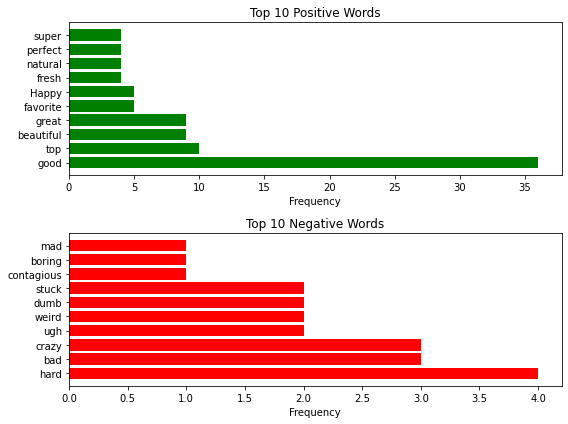

In [51]:
import matplotlib.pyplot as plt

# Get the top 10 positive words and their frequencies
top_positive_words = positive_freq_dist.most_common(10)
positive_words, positive_frequencies = zip(*top_positive_words)

# Get the top 10 negative words and their frequencies
top_negative_words = negative_freq_dist.most_common(10)
negative_words, negative_frequencies = zip(*top_negative_words)

# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 6))

# Plot the top 10 positive words
ax1.barh(positive_words, positive_frequencies, color='green')
ax1.set_title('Top 10 Positive Words')
ax1.set_xlabel('Frequency')

# Plot the top 10 negative words
ax2.barh(negative_words, negative_frequencies, color='red')
ax2.set_title('Top 10 Negative Words')
ax2.set_xlabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


In [45]:
nltk.download('words')


[nltk_data] Downloading package words to
[nltk_data]     /Users/saipranayreddy/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [24]:
ner_comments = [ne_chunk(comment) for comment in pos_tagged_comments]


In [25]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/saipranayreddy/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [26]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/saipranayreddy/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [27]:
ner_comments

[Tree('S', [('girls', 'NNS'), ('making', 'VBG'), ('history', 'NN'), ('hasnt', 'VBD'), ('even', 'RB'), ('1', 'CD'), ('year', 'NN'), ('since', 'IN'), ('debuted', 'VBN'), ('im', 'NN'), ('proud', 'NN')]),
 Tree('S', [('NewJeans', 'NNS'), Tree('ORGANIZATION', [('MVs', 'NNP')]), ('doesnt', 'NN'), ('feel', 'NN'), ('overproduced', 'VBD'), ('leaving', 'VBG'), ('impression', 'NN'), ('bunch', 'NN'), ('friends', 'VBZ'), ('fun', 'JJ'), ('industry', 'NN'), ('plants', 'NNS'), ('Their', 'PRP$'), ('choreo', 'NN'), ('also', 'RB'), ('seems', 'VBZ'), ('playful', 'JJ'), ('overly', 'RB'), ('strict', 'JJ'), ('leaving', 'VBG'), ('raw', 'JJ'), ('feeling', 'NN'), ('allows', 'VBZ'), ('viewers', 'NNS'), ('feel', 'VBP'), ('connected', 'VBN'), ('Usually', 'RB'), ('artists', 'VBZ'), ('feel', 'VBP'), ('like', 'IN'), ('levels', 'NNS'), ('NJ', 'NNP'), ('seems', 'VBZ'), ('different', 'JJ'), ('kind', 'NN'), ('connection', 'NN'), ('audience', 'NN'), ('big', 'JJ'), ('fan', 'NN'), ('company', 'NN'), ('direction', 'NN'), ('h

In [28]:
dictionary = corpora.Dictionary(df['processed_comment'])
corpus = [dictionary.doc2bow(comment) for comment in df['processed_comment']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary)


In [29]:
lda_model

In [30]:
corpus 

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1)],
 [(11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 3),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1)],
 [(50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)],
 [(3, 1),
  (33, 1),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1)],
 [(89, 1), (90,

In [31]:
keywords = set()
for comment in df['processed_comment']:
    keywords.update(comment)

topic_keywords = []
for topic in lda_model.print_topics():
    topic_keywords.extend(topic[1].split("+"))

# Print the extracted keywords
print("Keywords:")
print(keywords)
print("\nTopic Keywords:")
print(topic_keywords)

Keywords:
{'girls', 'septiembre', 'perfect', 'dropped', 'immersive', '녹아', 'shines', '보인다', '추가342만', 'song', 'aaaaaaaaaaaaa', 'lately', 'KPOP', 'Aku', '마시따는', 'random', 'Romanized', 'casi', '싶은', '굳이', 'personality', 'individual', 'MASHITAAA', 'dará', 'hyperpop', 'performance', 'Cool', 'prechorus', 'são', 'names', 'heres', 'Canciones', '에너지가적어도', 'known', 'Korea', '소리가', 'hahahaha', '53omg', 'definetly', 'familiarit', 'snyc', '1만', 'trained', 'viciantes', 'department', 'Esto', 'SINGER', 'tiene', 'As', 'acuerdo', 'wow', 'apaixonantes', '헤모코', '손짓하는', '생각합니다', 'push', 'PRETTY', 'seruu', 'Newzins', 'fue', '예쁘고', 'lagu', 'pre', 'sucks', '내게', 'baila', 'para', 'Чжонмаль', '22', 'Fantásticas', 'aquí', '맞아', 'pegadizas', 'comercial', 'DAN', 'words', 'их', 'friking', 'literal', 'A100', 'delas', 'expectations', '퀄리티와', '이리', 'starts', '6', '성공할', 'bright', 'Attention', 'timenot', 'Pakistanis', 'OBSESSEDDDDDD', 'stucked', '감히', 'promotion', '바다배경에서', '중독성있고', 'without', 'ENJOY', 'después', 'Osh

In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the preprocessed comments into a document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df['processed_comment'].apply(lambda x: ' '.join(x)))

# Apply LDA to the document-term matrix
lda = LatentDirichletAllocation(n_components=10)  # Specify the number of topics
lda.fit(dtm)

# Get the most important keywords for each topic
feature_names = vectorizer.get_feature_names()
num_top_keywords = 5  # Number of keywords to extract for each topic
topic_keywords = []
for topic_weights in lda.components_:
    top_keyword_indices = topic_weights.argsort()[:-num_top_keywords - 1:-1]
    top_keywords = [feature_names[index] for index in top_keyword_indices]
    topic_keywords.append(top_keywords)

In [34]:
topic_keywords

[['너무', '민지', '진짜', 'part', 'minjis'],
 ['like', 'im', 'song', 'us', 'dont'],
 ['part', 'cola', 'minji', 'danielle', 'coca'],
 ['love', 'hyein', '구독자', 'haerin', 'newjeans'],
 ['love', 'song', 'dance', 'choreography', 'catchy'],
 ['like', 'beautiful', 'girls', 'love', 'minji'],
 ['en', 'de', 'el', 'la', 'con'],
 ['song', 'like', 'this', 'good', '뉴진스'],
 ['newjeans', 'love', '너무', 'siiiii', 'haerin'],
 ['new', 'jeans', 'newjeans', 'amazing', 'ey']]

/var/folders/p6/kpwvshld1cz16s5ky9m6qq8m0000gn/T/ipykernel_1644/1421412140.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tidy_comment'] = df['tidy_comment'].str.replace("[^a-zA-Z#]", " ")


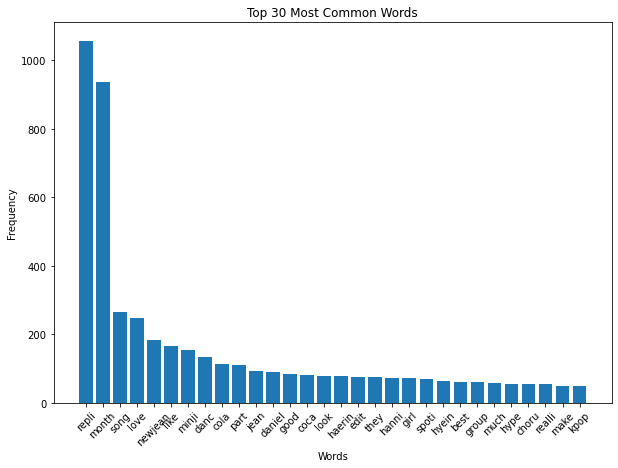

In [35]:
import re
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

df = pd.DataFrame(data, columns=['comment'])

# Remove mentions
df['tidy_comment'] = np.vectorize(remove_pattern)(df['comment'], "@[\w]*")

# Remove special characters and numbers
df['tidy_comment'] = df['tidy_comment'].str.replace("[^a-zA-Z#]", " ")

# Tokenization
tokenized_comment = df['tidy_comment'].apply(lambda x: x.split())

# Remove stopwords
tokenized_comment = tokenized_comment.apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
tokenized_comment = tokenized_comment.apply(lambda x: [stemmer.stem(i) for i in x])

# Lemmatization
lemmatizer = WordNetLemmatizer()
tokenized_comment = tokenized_comment.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

# Join the tokens back into sentences
for i in range(len(tokenized_comment)):
    tokenized_comment[i] = ' '.join(tokenized_comment[i])

df['tidy_comment'] = tokenized_comment

# Create word cloud
all_words = ' '.join([text for text in df['tidy_comment']])

# Extract meaningful words
meaningful_words = []
for word in all_words.split():
    if len(word) > 3:  # Filter out short words
        meaningful_words.append(word)

from collections import Counter

# Count word frequency
word_freq = Counter(meaningful_words)

# Get the most common words and their frequencies
top_words = word_freq.most_common(30)  # Change the number as desired

# Extract words and frequencies
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

# Create bar chart
plt.figure(figsize=(10, 7))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words')
plt.xticks(rotation=45)
plt.show()


In [36]:
meaningful_words

['skip',
 'navig',
 'sign',
 'next',
 'best',
 'stage',
 'compil',
 'music',
 'bank',
 'song',
 'festiv',
 'view',
 'year',
 'cancel',
 'play',
 'newjean',
 'zero',
 'perform',
 'video',
 'newjean',
 'subscrib',
 'subscrib',
 'share',
 'download',
 'view',
 'month',
 'connect',
 'newjean',
 'phone',
 'http',
 'phone',
 'onelink',
 'show',
 'comment',
 'sort',
 'comment',
 'month',
 'girl',
 'make',
 'histori',
 'hasnt',
 'even',
 'year',
 'sinc',
 'debut',
 'proud',
 'repli',
 'repli',
 'month',
 'newjean',
 'feel',
 'overproduc',
 'leav',
 'impress',
 'bunch',
 'friend',
 'industri',
 'plant',
 'their',
 'choreo',
 'also',
 'seem',
 'play',
 'overli',
 'strict',
 'leav',
 'feel',
 'allow',
 'viewer',
 'feel',
 'connect',
 'usual',
 'artist',
 'feel',
 'like',
 'level',
 'seem',
 'differ',
 'kind',
 'connect',
 'audienc',
 'compani',
 'direct',
 'head',
 'toward',
 'repli',
 'repli',
 'month',
 'favorit',
 'part',
 'haerin',
 'daniel',
 'across',
 'screen',
 'silli',
 'repli',
 'repli'

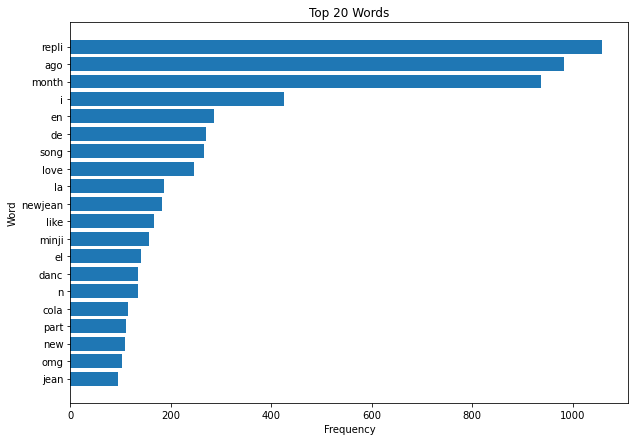

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with word frequencies
word_freq = df['tidy_comment'].str.split(expand=True).stack().value_counts().reset_index()
word_freq.columns = ['word', 'frequency']

# Set the number of words to display
num_words = 20

# Select the top 'num_words' words by frequency
top_words = word_freq.head(num_words)

# Create a horizontal bar chart
plt.figure(figsize=(10, 7))
plt.barh(top_words['word'], top_words['frequency'])
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top {} Words'.format(num_words))
plt.gca().invert_yaxis()  # Invert y-axis to display highest frequency words on top
plt.show()


In [38]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saipranayreddy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/saipranayreddy/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [40]:
import matplotlib.font_manager as fm

# Retrieve the list of TrueType font files
font_files = fm.findSystemFonts()

# Print the font file paths
for font_file in font_files:
    print(font_file)


/opt/X11/share/system_fonts/Supplemental/DecoTypeNaskh.ttc
/opt/X11/share/system_fonts/Supplemental/InaiMathi-MN.ttc
/System/Library/Fonts/Supplemental/NotoSansMarchen-Regular.ttf
/System/Library/Fonts/Supplemental/Corsiva.ttc
/System/Library/Fonts/NotoSansMyanmar.ttc
/opt/X11/share/system_fonts/Supplemental/NotoSansTagbanwa-Regular.ttf
/opt/X11/share/system_fonts/Supplemental/NotoSansMahajani-Regular.ttf
/System/Library/Fonts/GeezaPro.ttc
/System/Library/Fonts/Supplemental/Marion.ttc
/System/Library/Fonts/Supplemental/Arial Italic.ttf
/opt/X11/share/system_fonts/Supplemental/Trattatello.ttf
/opt/X11/share/system_fonts/Kohinoor.ttc
/System/Library/Fonts/Supplemental/Diwan Thuluth.ttf
/System/Library/Fonts/Supplemental/NotoSansOsmanya-Regular.ttf
/opt/X11/share/system_fonts/STHeiti Light.ttc
/opt/X11/share/system_fonts/Supplemental/Arial Narrow.ttf
/opt/X11/share/fonts/OTF/SyrCOMTurAbdin.otf
/opt/X11/share/system_fonts/Supplemental/NotoSansMeeteiMayek-Regular.ttf
/System/Library/Fonts/S

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [41]:
!python3 -m PIL


--------------------------------------------------------------------
Pillow 10.0.0
Python 3.10.9 (main, Jan 11 2023, 09:18:18) [Clang 14.0.6 ]
--------------------------------------------------------------------
Python modules loaded from /Users/saipranayreddy/miniconda3/lib/python3.10/site-packages/PIL
Binary modules loaded from /Users/saipranayreddy/miniconda3/lib/python3.10/site-packages/PIL
--------------------------------------------------------------------
--- PIL CORE support ok, compiled for 10.0.0
--- TKINTER support ok, loaded 8.6
--- FREETYPE2 support ok, loaded 2.13.1
--- LITTLECMS2 support ok, loaded 2.15
--- WEBP support ok, loaded 1.3.1
--- WEBP Transparency support ok
--- WEBPMUX support ok
--- WEBP Animation support ok
--- JPEG support ok, compiled for libjpeg-turbo 2.1.5.1
--- OPENJPEG (JPEG2000) support ok, loaded 2.5.0
--- ZLIB (PNG/ZIP) support ok, loaded 1.2.13
--- LIBTIFF support ok, loaded 4.5.1
*** RAQM (Bidirectional Text) support not installed
*** LIBIMAGEQUA

In [42]:
!pip install pillow

In [43]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
